# Predicting Loan using Logistic Regression

We predicte loan status by using logistic regression. For the same loan dataset used which is downloaded from kaggle(https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv).

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [122]:
#1.Importing dependencies and Load data
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Loading dataset

data=pd.read_csv("loan_dataset.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#2. Exploratory Data Analysis
# No of rows and columns
data.shape

(614, 13)

In [4]:
# Columns
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Dataset Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Data types

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Checking null values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Filling Missing values

data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

data['Self_Employed']=data['Self_Employed'].fillna(data.Self_Employed.mode()[0])

data['Dependents']=data['Dependents'].fillna(data.Dependents.mode()[0])

data['Gender']=data['Gender'].fillna(data.Gender.mode()[0])

data['Married']=data['Married'].fillna(data.Married.mode()[0])

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Statistics summary

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

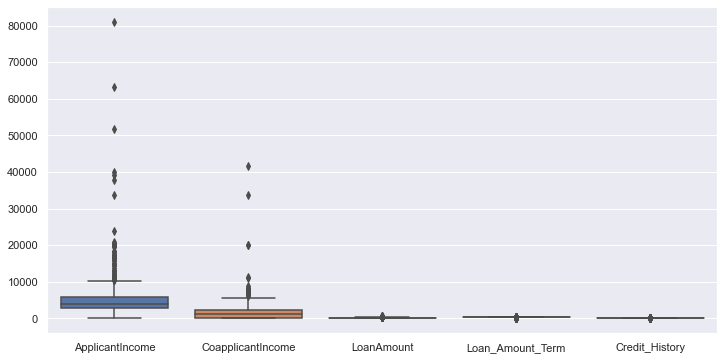

In [11]:
#Outlier Detection using boxplot

sns.set(rc={"figure.figsize":(12,6)})
sns.boxplot(data=data)

In [12]:
# Removal of Outlier using Z score method

data['zscore']=(data.ApplicantIncome-data.ApplicantIncome.mean())/data.ApplicantIncome.std()
data1=data[~((data['zscore']>3)|(data['zscore']<-3))]
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.356773


In [13]:
#data1=data1.drop('zscore',axis=1)

In [14]:
# Removal of Outlier using Z score method

data1['zscore']=(data1.CoapplicantIncome-data1.CoapplicantIncome.mean())/data1.CoapplicantIncome.std()
data2=data1[~((data1['zscore']>3)|(data1['zscore']<-3))]
data2

C:\Users\MADHURI\AppData\Local\Temp\ipykernel_7952\2583099633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['zscore']=(data1.CoapplicantIncome-data1.CoapplicantIncome.mean())/data1.CoapplicantIncome.std()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,-0.556516
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.043168
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.556516
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.246186
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.556516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.556516
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.556516
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.474816
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.556516


In [15]:
data2=data2.drop('zscore',axis=1)

In [16]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
# Data Encoding

data2['Loan_Status']=data2['Loan_Status'].map({'Y':1,'N':0})

In [18]:
data2.Education.value_counts()

Graduate        466
Not Graduate    134
Name: Education, dtype: int64

In [19]:
data2['Education']=data2['Education'].map({'Graduate':1,'Not Graduate':0})

In [20]:
data2.Self_Employed.value_counts()

No     520
Yes     80
Name: Self_Employed, dtype: int64

In [21]:
data2['Self_Employed']=data2['Self_Employed'].map({'Yes':1,'No':0})

In [22]:
data2.Property_Area.value_counts()

Semiurban    226
Urban        197
Rural        177
Name: Property_Area, dtype: int64

In [23]:
data2.Gender.value_counts()

Male      489
Female    111
Name: Gender, dtype: int64

In [24]:
data2['Gender']=data2['Gender'].map({'Male':1,'Female':0})

In [25]:
data2.Married.value_counts()

Yes    391
No     209
Name: Married, dtype: int64

In [26]:
data2['Married']=data2['Married'].map({'Yes':1,'No':0})

In [27]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [28]:
data3=data2.drop(['Loan_ID','Dependents','Education'],axis=1)

In [29]:
data3.shape

(600, 10)

In [30]:
# Data encoding using get_dummies method

data3=pd.get_dummies(data3)

In [31]:
data3

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


<AxesSubplot:>

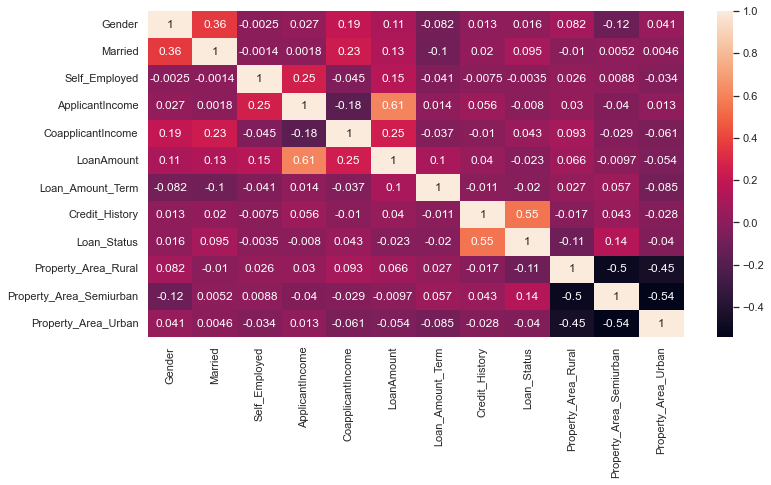

In [32]:
# Correlation between features
sns.heatmap(data3.corr(),annot=True)

In [33]:
#3 Model Creation
# Selection of independent and dependent feature
# X is independent and y is dependent(target) feature

X=data3.drop(['Loan_Status','Self_Employed','Property_Area_Rural','Property_Area_Urban'],axis=1)
y=data3['Loan_Status']

In [113]:
# Splitting the data 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print("No of samples:")
print("X_train:",np.shape(X_train))
print('X_test:',np.shape(X_test))
print('y_train:',np.shape(y_train))
print('y_test:',np.shape(y_test))

No of samples:
X_train: (420, 8)
X_test: (180, 8)
y_train: (420,)
y_test: (180,)


In [114]:
# train the model

lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [115]:
#4 Model Evaluation
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[ 33,  34],
       [  1, 112]], dtype=int64)

In [116]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print("TP:",TP)
print("TN:",TN)
print("FN:",FN)
print("FP:",FP)

TP: 33
TN: 112
FN: 1
FP: 34


In [117]:
p1=TP/(TP+FP)
r1=TP/(TP+FN)

print('Accuracy:',(TP+TN)/(TP+TN+FP+FN))
print('Precision:',TP/(TP+FP))
print('Recall:',TP/(TP+FN))
print('F1-score:',2*((p1*r1)/(p1+r1)))

Accuracy: 0.8055555555555556
Precision: 0.4925373134328358
Recall: 0.9705882352941176
F1-score: 0.6534653465346534


In [118]:
# Accuracy score

ac=accuracy_score(y_test,y_pred)
ac

0.8055555555555556

In [119]:
# Precision Score

p=precision_score(y_test,y_pred)
p

0.7671232876712328

In [120]:
# recall score

r=recall_score(y_test,y_pred)
r

0.9911504424778761

In [121]:
# f1 score

f1=2*((p*r)/(p+r))
f1

0.8648648648648648

In [133]:
# Model predication
result=model.predict([[1,1,4583,5625.0,255.0,360.0,1.0,1]])
if result[0]==1:
    print("Congratulations your eligible for loan")
else:
    print("Sorry you are not eligible for loan...!")

Congratulations your eligible for loan


C:\Users\MADHURI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [123]:
# Classification report of Classifiaction Algorithm

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65        67
           1       0.77      0.99      0.86       113

    accuracy                           0.81       180
   macro avg       0.87      0.74      0.76       180
weighted avg       0.84      0.81      0.79       180

